# 可視化

必要なライブラリのインストールとデータの読み込み

In [21]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import statsmodels.api as sm

import japanize_matplotlib
import matplotlib.pyplot as plt
plt.style.use('fast')# スタイルの設定
plt.rcParams['figure.figsize'] = [9, 5]# サイズの設定

# データの読み込み
file_path = "../data/BloodDonation.csv"
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime((df['year'].astype(str)) + '-' + (df['month'].astype(str)))# date列を作成

### 献血方法別の献血者の割合

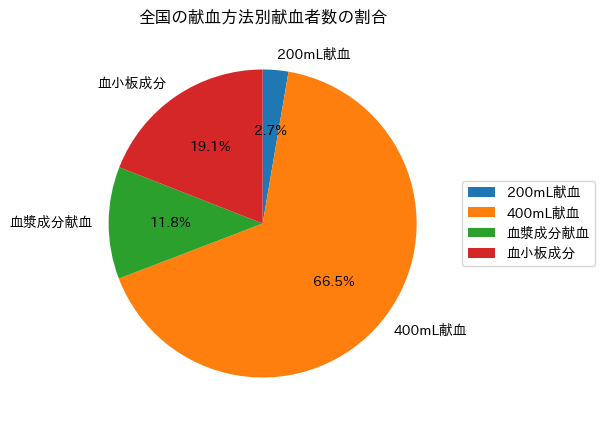

In [22]:
# dateごとの全国のblood_donorsでグループ化
grouped_date_total = df.groupby(['date'])['blood_donors'].sum().to_frame()

# 平均を求める
bd_200 = df['200mL_blood_donation'].mean()
bd_400 = df['400mL_blood_donation'].mean()
bd_PPP = df['PPP_blood_donation'].mean()
bd_PC = df['PC_blood_donation'].mean()

# グラフ化
fig, ax = plt.subplots()
x = np.array([bd_200, bd_400, bd_PC, bd_PPP])
label = ["200mL献血", "400mL献血", "血漿成分献血", "血小板成分"]
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.title("全国の献血方法別献血者数の割合")
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

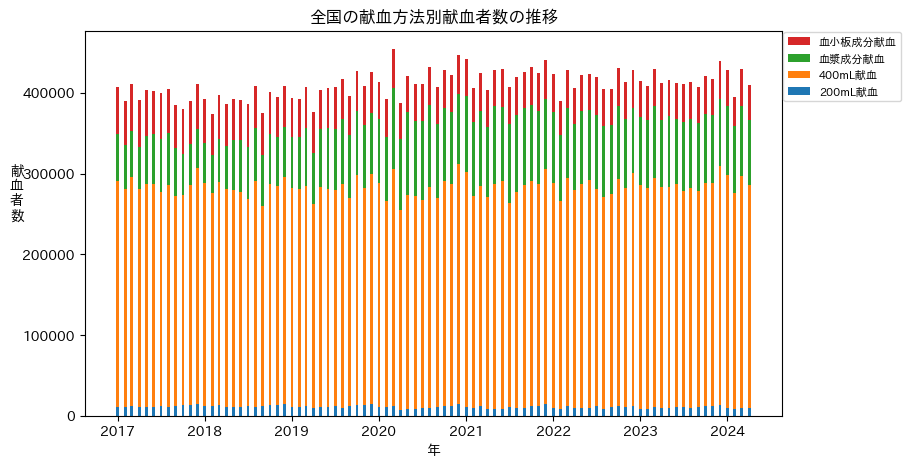

In [23]:
# dateごとの総和を求めグループ化
bd_200 = df.groupby(['date'])['200mL_blood_donation'].sum()
bd_400 = df.groupby(['date'])['400mL_blood_donation'].sum()
bd_PPP = df.groupby(['date'])['PPP_blood_donation'].sum()
bd_PC = df.groupby(['date'])['PC_blood_donation'].sum()

# 積み上げ棒グラフの設定
fig, ax = plt.subplots()
x = df.groupby(['date'])['blood_donors'].sum().index
width = 12
p1 = ax.bar(x, bd_200, width)
p2 = ax.bar(x, bd_400, width, bottom=bd_200)
p3 = ax.bar(x, bd_PPP, width, bottom=bd_200+bd_400)
p4 = ax.bar(x, bd_PC, width, bottom=bd_200+bd_400+bd_PPP)

# ラベルの設定
plt.title("全国の献血方法別献血者数の推移")
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.legend((p4[0], p3[0], p2[0], p1[0]), ("血小板成分献血", "血漿成分献血", "400mL献血", "200mL献血"),
            bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=.1, fontsize=8)
plt.show()

### 献血者数の推移

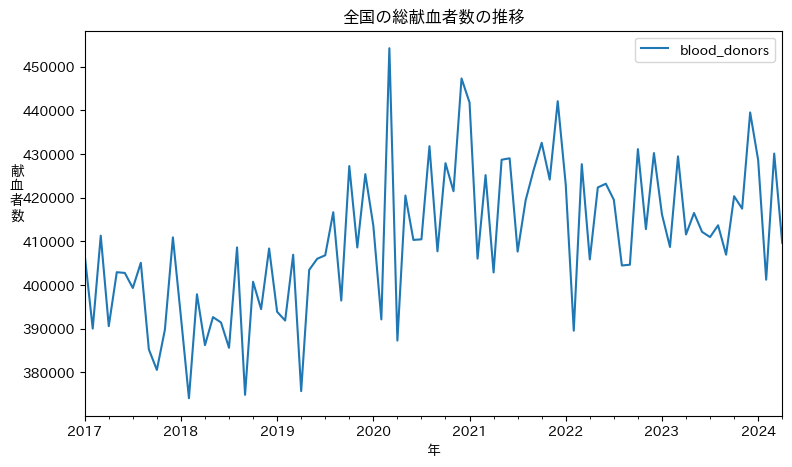

In [24]:
# 全期間を通した全国の総献血者の推移

grouped_date_total.plot()
plt.title("全国の総献血者数の推移")
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.show()

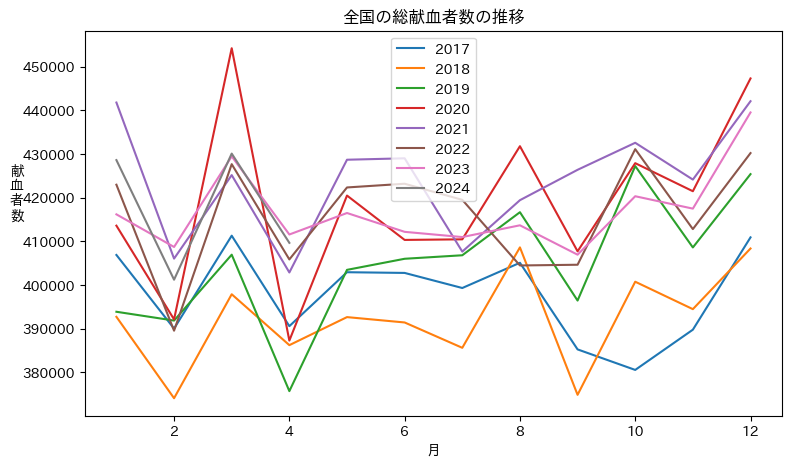

In [25]:
# 年ごとに分けてプロット

data = df[['year', 'month', 'blood_donors']]
grouped_month_total = data.groupby(['year', 'month']).sum().reset_index()

for year in grouped_month_total['year'].unique():
    plt.plot(
        grouped_month_total[grouped_month_total['year'] == year]['month'], 
        grouped_month_total[grouped_month_total['year'] == year]['blood_donors'], 
        label=str(year)
    )

# ラベルの設定
plt.title("全国の総献血者数の推移")
plt.xlabel("月")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.legend()
plt.show()


2月は減少し3月に増加する傾向がどの年にも見られる。

### 献血者数の分布

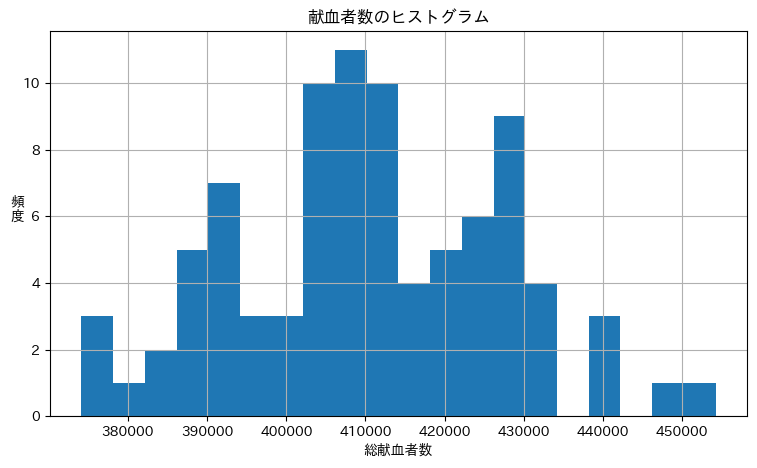

In [26]:
grouped_date_total.hist(bins=20)
plt.title("献血者数のヒストグラム")
plt.xlabel("総献血者数")
plt.ylabel("頻\n度", rotation=0)
plt.show()

適切なbinsの値の取り方がわからない

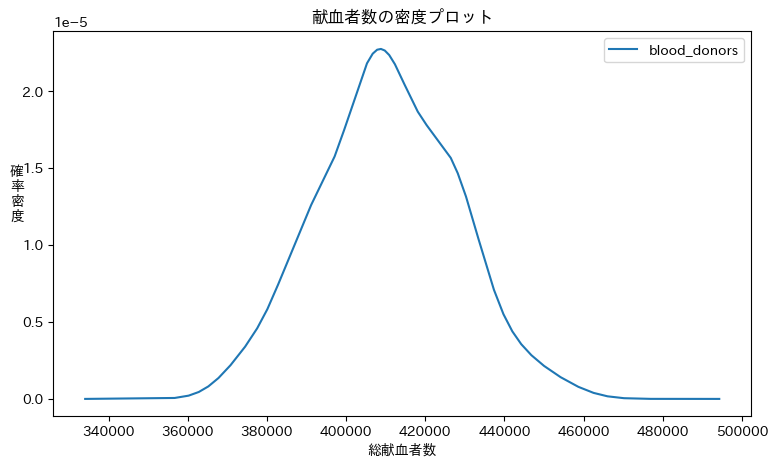

In [27]:
# 密度プロット
grouped_date_total.plot(kind='kde')
plt.title("献血者数の密度プロット")
plt.xlabel("総献血者数")
plt.ylabel("確\n率\n密\n度", rotation=0)
plt.show()

**密度プロット：**<br>
主に量的変数に対して、分布の形状をカーネル密度推定による曲線で表現するグラフ。<br>
ヒストグラムより滑らかに分布を表現することが可能だが、あくまでも推定結果であることに注意。<br>

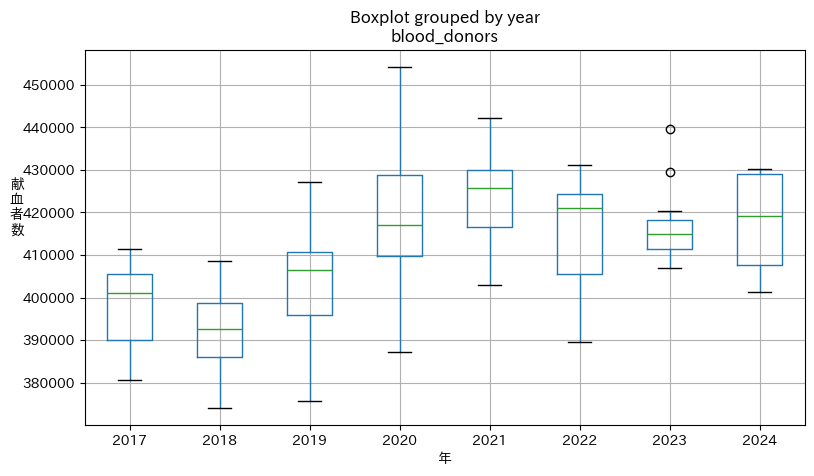

In [28]:
# 箱ひげ図
grouped_month_total.boxplot(column='blood_donors', by='year')
plt.xlabel("年")
plt.ylabel("献\n血\n者\n数", rotation=0)
plt.show()

Lag 1 correlation: 0.26781799877602563
Lag 2 correlation: 0.49634560854464754
Lag 7 correlation: 0.5662894579583717
Lag 12 correlation: 0.6787654473334587


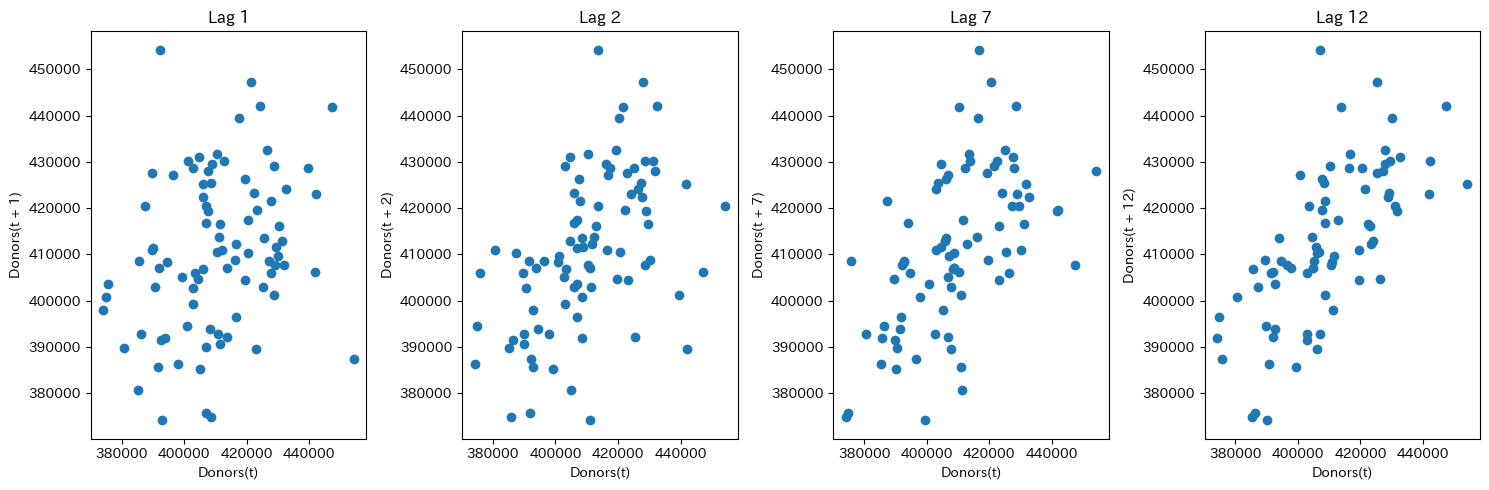

In [36]:
# ラグプロット

# lag値のリスト
lags = [1, 2, 7, 12]

fig, axes = plt.subplots(nrows=1, ncols=len(lags), figsize=(15, 5))

# 各 lag に対して lag_plot を描画
for i, lag in enumerate(lags):
    ax = axes[i] if len(lags) > 1 else axes
    tmp_series = grouped_month_total['blood_donors']
    lag_plot(tmp_series, lag=lag, ax=ax)
    ax.set_title(f'Lag {lag}')
    ax.set_xlabel('Donors(t)')
    ax.set_ylabel(f'Donors(t + {lag})')
    # 相関係数を計算
    correlation = tmp_series.autocorr(lag=lag)
    print(f'Lag {lag} correlation: {correlation}')

plt.tight_layout()
plt.show()

lag12でやや正の相関があった

### 参考にしたサイト等
https://masanori.hateblo.jp/entry/2019/09/25/205109